In [34]:
import matplotlib.pyplot as plt

from Random_walker import RandomWalk, CTRandomWalk, UniformKdeInt, RandomWalker2D
from scipy.stats import gaussian_kde

# Continuous time random walk
Init the Walker objects.

In [35]:
# Basic data
jump_measurements = [1.5, 1.5, 1.3, 1.6, 2.3, 4., 3.2, 1.8, 1.45]
jump_kde = gaussian_kde(jump_measurements, bw_method=1e-1)
waiting_kde = UniformKdeInt(0, 100)

# A single Walker
W = RandomWalker2D(jump_kde)

# A RandomWalk Object
R = CTRandomWalk(W, waiting_time_kde=waiting_kde, n_walkers=1)

## Single trajectory
Sample a 2-D trajectory. The interplay between waiting time range and maximum time of the trajectory defines the granularity of the trajectory.

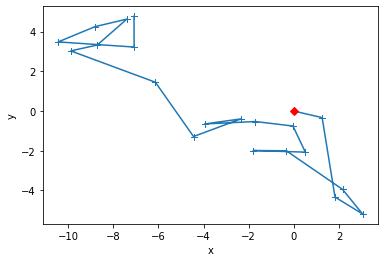

In [36]:
x, y, r2 = R.sample_trajectory(1000)
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x, y, "-+")
plt.plot(0.0, 0.0, "rD")

## x and y vs. time
Waiting times correspond to horizontal lines.

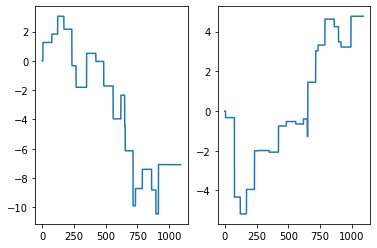

In [37]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(x)
ax2.plot(y)

# Compute squared displacment (for single walker)
The squared displacement is 
$$
SD(t) = x(t)^2 + y(t)^2
$$.

And the mean squared displacement is the mean over multiple walkers.

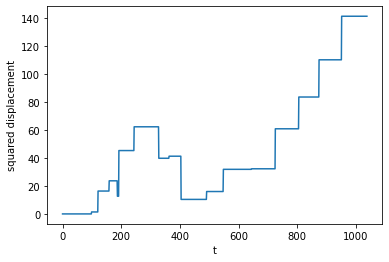

In [38]:
W = RandomWalker2D(jump_kde)
R = CTRandomWalk(W, waiting_time_kde=waiting_kde, n_walkers=1)

R.run(1000)
mse = R.MSD
plt.xlabel("t")
plt.ylabel("squared displacement")
plt.plot(mse)

# Compute mean squared displacment
The diffusion constant for normal diffusion (in 2-D) is defined as 
$$
MSD = 4  D  t.
$$

Note that for anomalous diffusion a linear slope is just an approximation. Here we have
$$
MSD_\alpha = 4  D_\alpha  t^\alpha, 
$$
where $D_\alpha $ is a generalized diffusion coefficient.

===> Diffusion constant: D = 0.022811863015675973


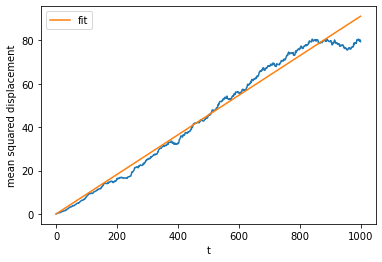

In [39]:
W = RandomWalker2D(jump_kde)
R = CTRandomWalk(W, waiting_time_kde=waiting_kde, n_walkers=100)

R.run(1000)
mse = R.MSD
plt.xlabel("t")
plt.ylabel("mean squared displacement")
plt.plot(mse)
plt.plot(4*R.estimate_D()*range(len(mse)), label="fit")
plt.legend()

print("===> Diffusion constant: D =", R.estimate_D())